
   # <b><center><font size="15"><span style='font-family:"Times New Roman"'> LEAD SCORING CASE STUDY </span></font></center></b>

***
 

<u><font size="6"><span style='font-family:"Times New Roman"'>Problem Statement</span></font></u>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses and fill the form if interested with their details. The company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. We need to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

<u><font size="6"><span style='font-family:"Times New Roman"'>Solution Approach</span></font></u>

Build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

<u><font size="6"><span style='font-family:"Times New Roman"'>Model Objective</span></font></u>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



<u><font size="6"><span style='font-family:"Times New Roman"'>Detailed Steps Followed while building the model</span></font></u>

1.	Firstly, we have imported the data and the libraries needed to build this model
2.	Data Cleaning:
    - Firstly, converted the columns have "Select" as their values to null as this gives us the information that either the user hasn’t selected any option or chose not to sele ct.
    - Have dropped the columns with greater than 45% missing values and even with one unique value
    - Performed binary mapping
    - Used the appropriate data imputation technique for other columns with missing values.
3.	Data Analysis:
    - Identified the outlier data and handled it.
    - Performed the EDA on all the columns and have plotted them against ‘Converted’ and inferred which columns might be suitable for further analysis
4.	Data Preparation:
    - Have created a dummy variable for the categorical columns
    - Performed the test train split
    - Feature scaling have been done
5.	Have started building the logistic regression model and using RFE technique chose the top 20 variables which will give more accurate results.
6.	Dropping the columns p values greater than 0.05 and VIF greater than 2.5
7.	Calculated the model evaluation parameters like accuracy, sensitivity, specificity, Precision and recall
8.	The optimal cut off was 0.35 so we have considered it as a cut off probability
9.	Make predictions on test data and using the same threshold value of 0.35 predicted if the lead is converted or not.
10.	Adding of a lead score column to the final model which is populated by multiplying the conversion probability value with 100 so that we get the score between 0-100.



## Import all the necessary libraries

In [1]:
#Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the necessary libraries
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# setting restriction on the number of rows and coulmns displayed in output
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)

# Libraries for data modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
# Creating a class color for setting print formatting
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

## Importing Leads dataset

In [4]:
#Read and Understand the data

df = pd.read_csv("C:/Users/patelvar/Desktop/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")
print(color.BOLD+color.BLUE+'Shape of the dataframe df : {}'.format(df.shape) +color.END)


Shape of the dataframe df : (9240, 37)


## Understanding the structure of Leads dataset

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Quality Check and Missing values

Few columns have "Select" as there values. This gives us the information that either the user havent selected any option or chose not to select. So these values gives us the same infomation as the "null" values. Hence we are converting Select into NULL values

In [8]:
#Replacing the SELECT value with null value
df = df.replace('Select',np.nan)

In [9]:
#Checking the number of missing values and its percentage
Total_missing = df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


In [10]:
# Checking how many columns have more than 45% of missing data

print(color.BOLD+ color.BLUE+'Total no of columns with missing values more than 45% : {}'.format(df_missing_values[df_missing_values['Percent_missing_values'] >= 45].shape[0])+ color.END)

Total no of columns with missing values more than 45% : 7


We are chosing to drop these 7 columns which have more than 45% of the missing data.

In [11]:
#Create a new dataframe named df_cleaned with all columns with data misisng < 45% for our  further analysis

df_cleaned = df.loc[:,(100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False) < 45]
df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
#Checking the columns present in dataframe
df_cleaned.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
#Dropping Prospect ID and Lead Number and Tags columns as these columns are scroe variables created by the sales team and may not be available.
df_cleaned = df_cleaned.drop(['Prospect ID','Lead Number','Tags'],axis=1)

### There might be few columns which have only one unique values. These columns does not give much of the insights. So chosing to drop them

In [14]:
#Checking the no of unique values in each column
df_cleaned.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [15]:
#Dropping all columns with one unique value

df_cleaned.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1,inplace = True)


In [16]:
#Verifying the unique values for each columns again to confirm
df_cleaned.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [17]:
# Get the value counts of all the columns

for column in df_cleaned:
    
    print(df_cleaned[column].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
No     9238
Yes  

Converting the values Yes and No to 1 and 0.- Binary mapping

In [18]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
varlist =  ['Do Not Email', 'Do Not Call','Search','X Education Forums','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# applying the map function
df_cleaned[varlist] = df_cleaned[varlist].apply(binary_map)

## Data Imputation - For the columns with less percentage of missing values (<45) 

In [19]:
# Checking the missing value columns
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(10)

,Total_missing_values,Percent_missing_values
City,3669.0,39.707792
Specialization,3380.0,36.580087
What matters most to you in choosing a course,2709.0,29.318182
What is your current occupation,2690.0,29.112554
Country,2461.0,26.634199
TotalVisits,137.0,1.482684
Page Views Per Visit,137.0,1.482684
Last Activity,103.0,1.114719
Lead Source,36.0,0.389610
Do Not Email,0.0,0.000000


Missing value imputation for each column 

As these are categorical column the best imputation method would be Mode

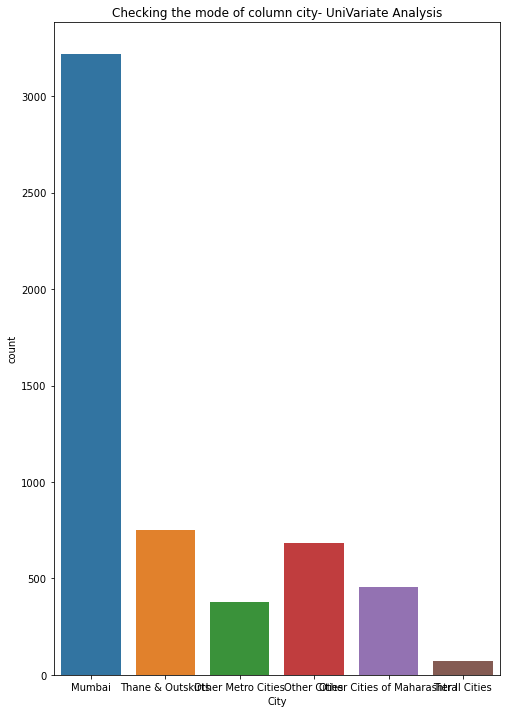

In [20]:
# Data imputation for column 'City'

plt.figure(figsize=(8,12))
sns.countplot(df_cleaned.City)
plt.title("Checking the mode of column city- UniVariate Analysis")
plt.show()

In [21]:
df_cleaned.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

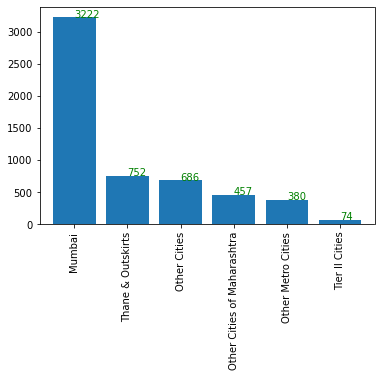

In [22]:
s = df_cleaned.City.value_counts()
ax=s.plot.bar(width=.8) 

for i, v in s.reset_index().iterrows():
    ax.text(i, v.City , v.City, color='green')

In [23]:
# Most of the leads are from Mumbai , so we can map the NAN values of 'City' to Mumbai
df_cleaned['City'] = df_cleaned['City'].replace(np.nan,'Mumbai')

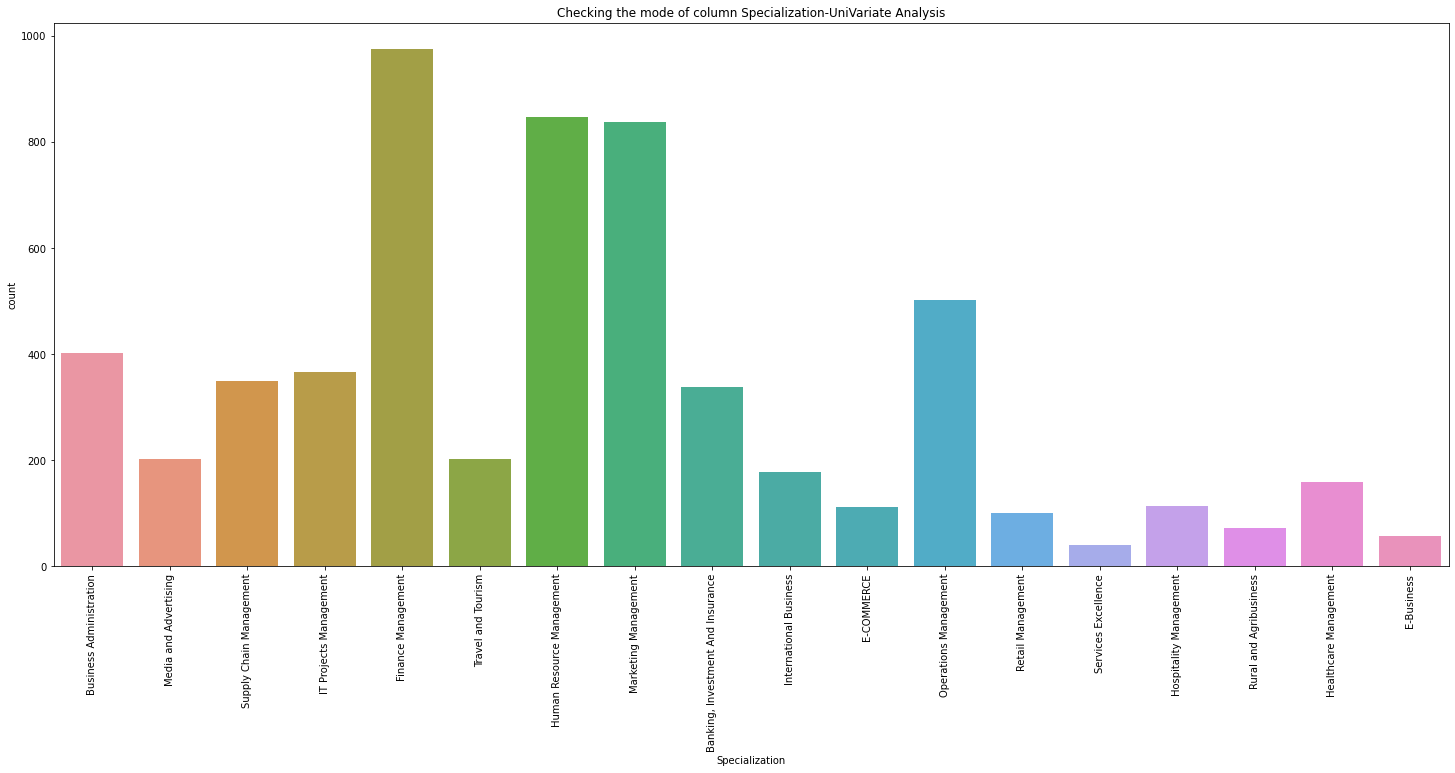

In [24]:
# Data imputation for column 'Specialization'

plt.figure(figsize=(25,10))
sns.countplot(df_cleaned.Specialization)
plt.xticks(rotation=90)
plt.title("Checking the mode of column Specialization-UniVariate Analysis")
plt.show()


In [25]:
df_cleaned.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [26]:
# As the specialization is distributed across multiple values ,we can impute it with mode and therefore we can put the Nan values as 'Unknown'

df_cleaned['Specialization']=df_cleaned['Specialization'].replace(np.nan,'Unknown')

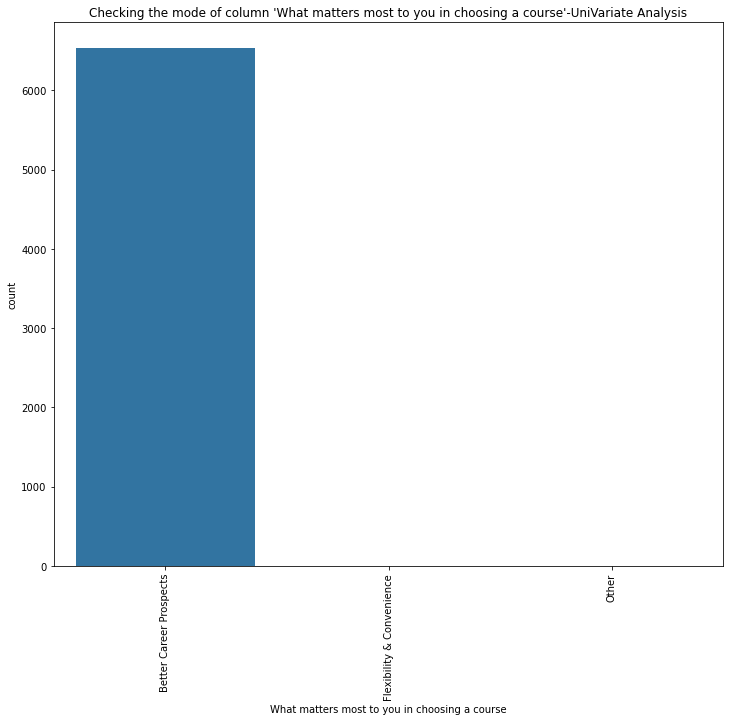

In [27]:
# Data imputation for column 'What matters most to you in choosing a course'

plt.figure(figsize=(12,10))
sns.countplot(df_cleaned['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.title("Checking the mode of column 'What matters most to you in choosing a course'-UniVariate Analysis")
plt.show()


In [28]:
df_cleaned['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Most of the values here is related to a single value 'Better Career Prospects' so we can map the NAN values to Better Career Prospects

df_cleaned['What matters most to you in choosing a course']=df_cleaned['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

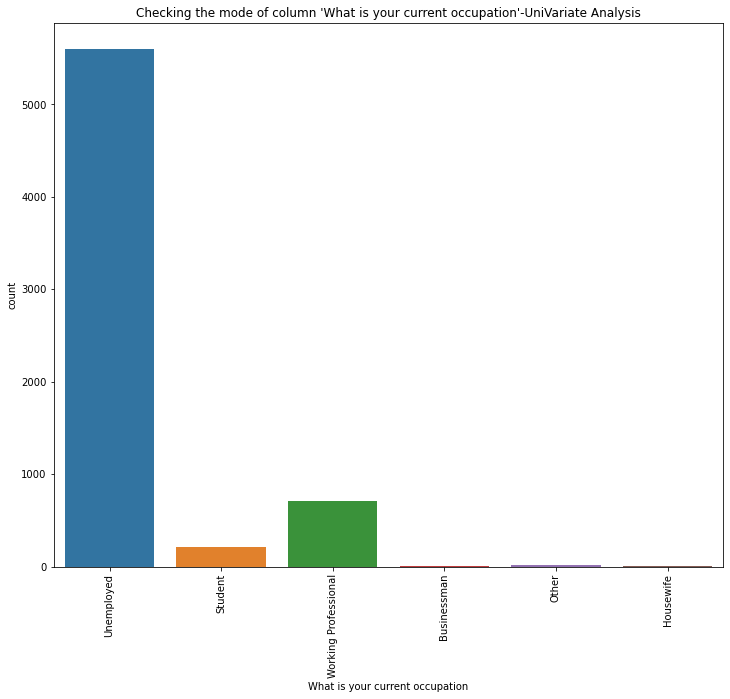

In [30]:

# Data imputation for column 'What is your current occupation'

plt.figure(figsize=(12,10))
sns.countplot(df_cleaned['What is your current occupation'])
plt.xticks(rotation=90)
plt.title("Checking the mode of column 'What is your current occupation'-UniVariate Analysis")
plt.show()


In [31]:
df_cleaned['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
# Replace all the Nan values with 'Unemployed' as it is the majority

df_cleaned['What is your current occupation']=df_cleaned['What is your current occupation'].replace(np.nan,'Unemployed')

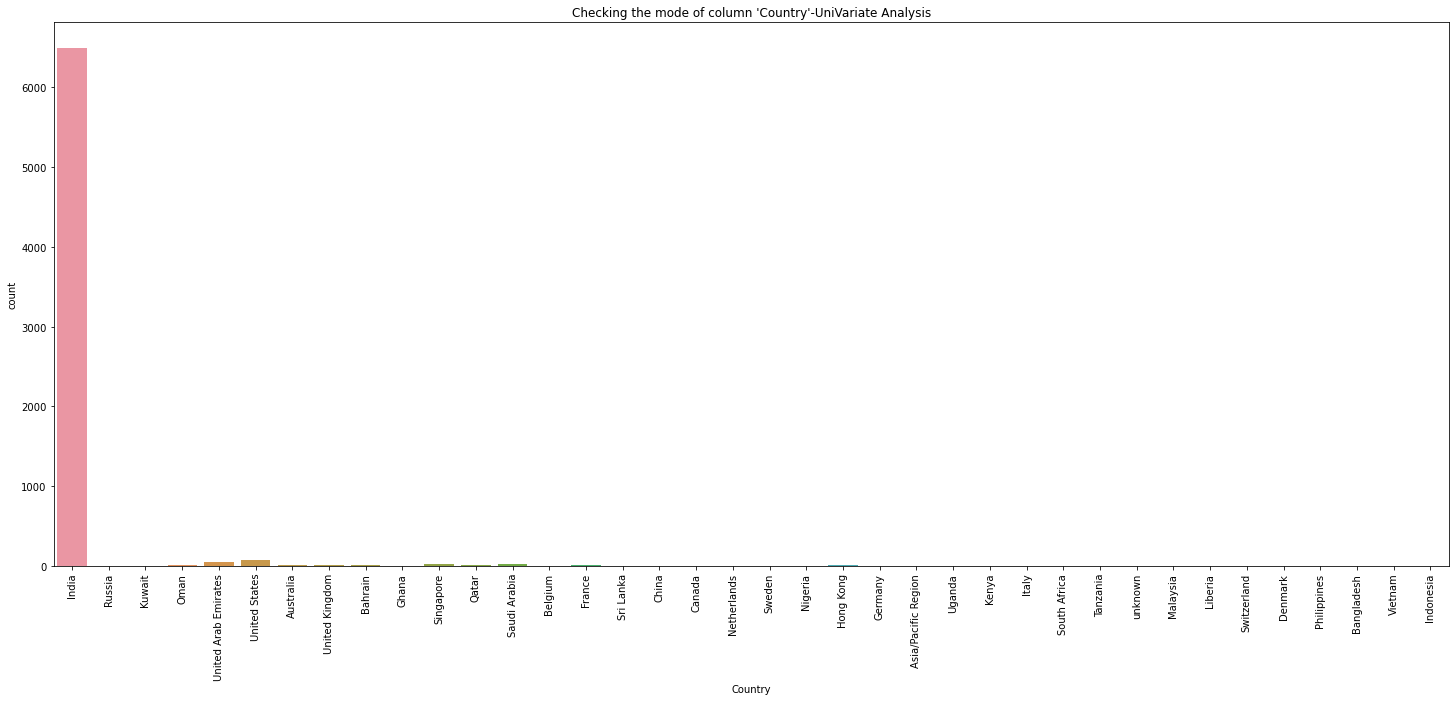

In [33]:
# Data imputation for column 'Country'

plt.figure(figsize=(25,10))
sns.countplot(df_cleaned['Country'])
plt.xticks(rotation=90)
plt.title("Checking the mode of column 'Country'-UniVariate Analysis")
plt.show()


In [34]:
df_cleaned['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
Italy                      2
Belgium                    2
Uganda                     2
China                      2
Ghana                      2
Philippines                2
Bangladesh                 2
Kenya                      1
Indonesia                  1
Denmark                    1
Malaysia                   1
Vietnam                    1
Liberia                    1
Tanzania      

In [35]:
#Replacing all the Nan values with India as it is the majority

df_cleaned['Country']=df_cleaned['Country'].replace(np.nan,'India')

In [36]:
# As the columns TotalVisits, Page Views Per Visit , Last Activity and Lead Source have less than 2% of Nan Values we chose to drop those rows .

df_cleaned.dropna(inplace=True)

In [37]:
#Final check of missing values 
Total_missing = df_cleaned.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df_cleaned.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0
Last Activity,0,0.0


In [38]:
# Number of rows retained after data cleaning

print(round(100*(df_cleaned.shape[0] / df.shape[0]),2))
            

98.2


We have retained a good number of rows(98%). No much data is lost

In [39]:
#Check the shape of cleaned dataframe
df_cleaned.shape

(9074, 22)

### Mergings categorical values 

Identifying the categorical columns with many categories and merging two or more categories of a column into a category named "Others"

In [40]:
# Get the value counts of all the columns

for column in df_cleaned:
    
    print(df_cleaned[column].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
0    8358
1     716
Name: Do Not Email, dtype: int64
___________________________________________________
0    9072
1       2
Name: Do Not Call, dtype: int64
_

The column 'Lead Source' 20 categories and about 13 cateorgories are having single digit values. So we chose to combine the categories into a single category named others as this Others category may give better insights than so many categories.


In [41]:
df_cleaned=df_cleaned.replace(to_replace=['bing','google','Click2call','Press_Release','Social Media','Live Chat','Pay per Click Ads','welearnblog_Home','NC_EDM','WeLearn','blog','testone','youtubechannel'],
           value= 'Others')

In [42]:
df_cleaned['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                28
Name: Lead Source, dtype: int64

The column 'Last Notable Activity' 16 categories and about 6 cateorgories are having single digit values. So we chose to combine the categories into a single category named others as this Others category may give better insights than so many categories.


In [43]:
df_cleaned=df_cleaned.replace(to_replace=['Email Marked Spam','View in browser link Clicked','Resubscribed to emails','Form Submitted on Website','Email Received','Approached upfront'],
           value= 'Others')

In [44]:
df_cleaned['Last Notable Activity'].value_counts()

Modified                    3267
Email Opened                2823
SMS Sent                    2152
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  45
Unreachable                   32
Had a Phone Conversation      14
Others                         7
Name: Last Notable Activity, dtype: int64

We are not mergings the values of column 'Country' as it has many single digit categories and by mergins them the count of others category may exceed drastically and may have a wrong impact on our analysis

## Visualising the Data

We would need to analyse the distribution of various values of all the above considered fields against the "Converted" value .

Intent is to check how  the convertion column is really dependent on the variable

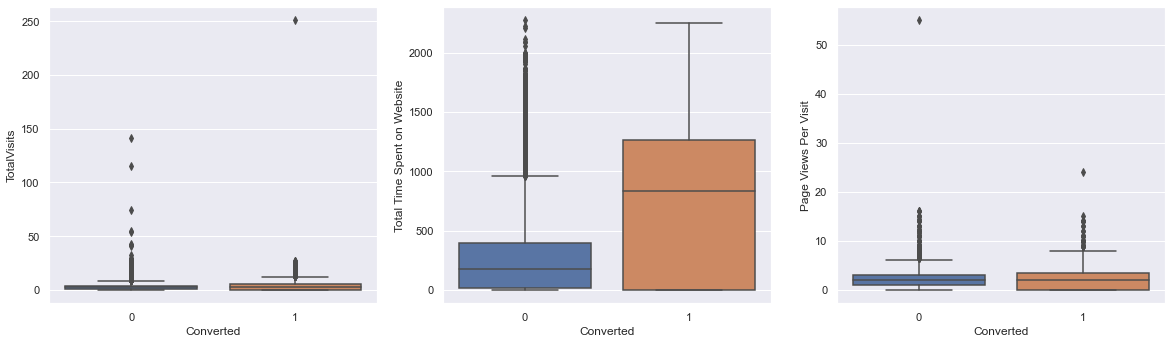

In [45]:
#First we will check the numerical variables against converted.
sns.set(font_scale=1)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = df_cleaned)
plt.subplot(2,3,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = df_cleaned)
plt.subplot(2,3,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = df_cleaned)
plt.show()

We find that these columns have outliers

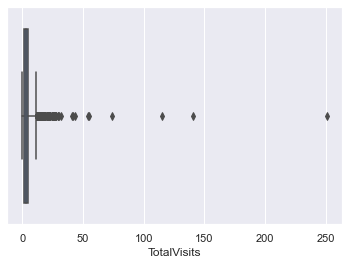

-5.0 11.0
Total no of outliers for column TotalVisits : 267


2.94247299977959

In [46]:
# outlier treatment for TotalVisits
#PLots for outlier analysis
sns.boxplot(df_cleaned.TotalVisits)
plt.show()

# Defining outlier treatment function  
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#Calculating IQR
lowerbound,upperbound = outlier_treatment(df_cleaned.TotalVisits)
print(lowerbound,upperbound)

#check outliers for the TotalVisits
clmn = 'TotalVisits'
Total_no_of_outliers = df_cleaned[(df_cleaned['TotalVisits'] > upperbound) | (df_cleaned['TotalVisits'] < lowerbound)] .shape[0]

print(color.BOLD + color.BLUE + 'Total no of outliers for column {0} : {1}'.format(clmn,Total_no_of_outliers ) + color.END)

#calculate % of outliers in the data
100*Total_no_of_outliers/df_cleaned.shape[0]

In [47]:
#Delete the TotalVisits outliers from the dataset as it is very less
df_cleaned = df_cleaned[(df_cleaned['TotalVisits'] <= upperbound) & (df_cleaned['TotalVisits'] >= lowerbound )]

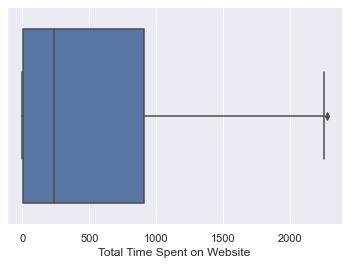

-1349.0 2259.0
Total no of outliers for column Total Time Spent on Website : 1


0.011354604292040422

In [48]:

#PLots for outlier analysis - Total Time Spent on Website
sns.boxplot(df_cleaned['Total Time Spent on Website'])
plt.show()


# Calculating IQR 
lowerbound,upperbound = outlier_treatment(df_cleaned['Total Time Spent on Website'])

print(lowerbound,upperbound)

#check outliers for the Total_Time_Spent_on_Website
clmn = 'Total Time Spent on Website'
Total_no_of_outliers = df_cleaned[(df_cleaned['Total Time Spent on Website'] > upperbound) | (df_cleaned['Total Time Spent on Website'] < lowerbound)] .shape[0]

print(color.BOLD + color.BLUE + 'Total no of outliers for column {0} : {1}'.format(clmn,Total_no_of_outliers ) + color.END)

#calculate % of outliers in the data
100*Total_no_of_outliers/df_cleaned.shape[0]

In [49]:
#Delete the 'Total Time Spent on Website' outliers from the dataset as it is very less 
df_cleaned = df_cleaned[(df_cleaned['Total Time Spent on Website']<= upperbound) & (df_cleaned['Total Time Spent on Website'] >= lowerbound )]

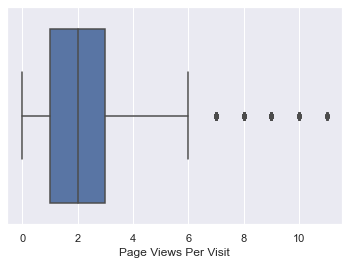

-2.0 6.0
Total no of outliers for column Page Views Per Visit : 294


3.338632750397456

In [50]:
#PLots for outlier analysis - Page Views Per Visit
sns.boxplot(df_cleaned['Page Views Per Visit'])
plt.show()


# Calculating IQR 
lowerbound,upperbound = outlier_treatment(df_cleaned['Page Views Per Visit'])

print(lowerbound,upperbound)

#check outliers for the Page Views Per Visit
clmn = 'Page Views Per Visit'
Total_no_of_outliers = df_cleaned[(df_cleaned['Page Views Per Visit'] > upperbound) | (df_cleaned['Page Views Per Visit'] < lowerbound)] .shape[0]

print(color.BOLD + color.BLUE + 'Total no of outliers for column {0} : {1}'.format(clmn,Total_no_of_outliers ) + color.END)

#calculate % of outliers in the data
100*Total_no_of_outliers/df_cleaned.shape[0]

In [51]:
#Delete the 'Total Time Spent on Website' outliers from the dataset as it is very less
df_cleaned = df_cleaned[(df_cleaned['Page Views Per Visit']<= upperbound) & (df_cleaned['Page Views Per Visit'] >= lowerbound )]

## Bivariate for the three numerical columns

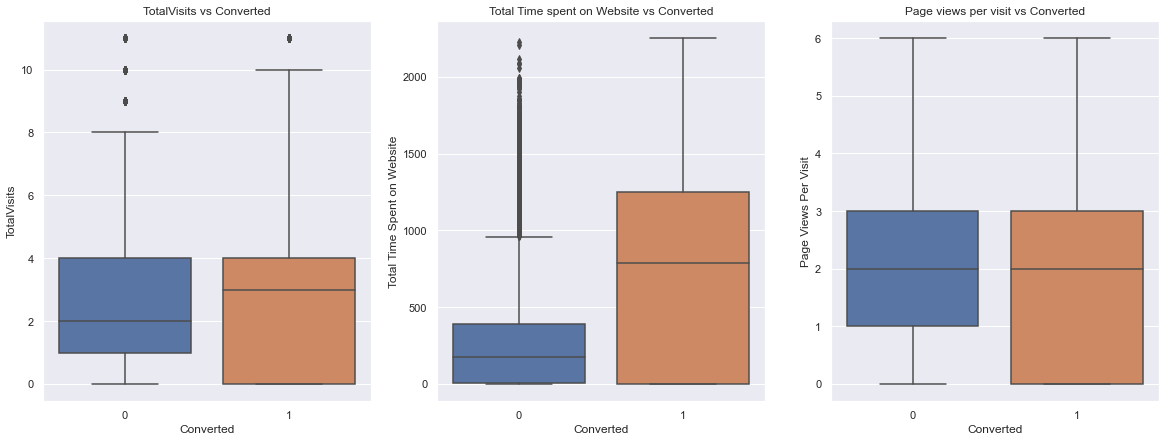

In [52]:

plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = df_cleaned)
plt.title("TotalVisits vs Converted")
plt.subplot(1,3,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = df_cleaned)
plt.title("Total Time spent on Website vs Converted")
plt.subplot(1,3,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = df_cleaned)
plt.title("Page views per visit vs Converted")
plt.show()

Inference:

Out of the 3 numerical variables TotalVisits and Page_Views_Per_visit doesnt show much effect on conversion rate, but Total_Time_Spent_on_Website seems to have an impact on coversion rate with more time spend leading to more likelier conversion.

## BiVariate Analysis 

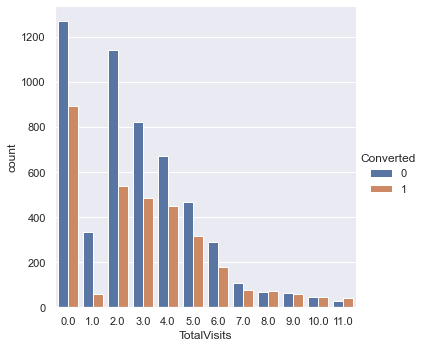

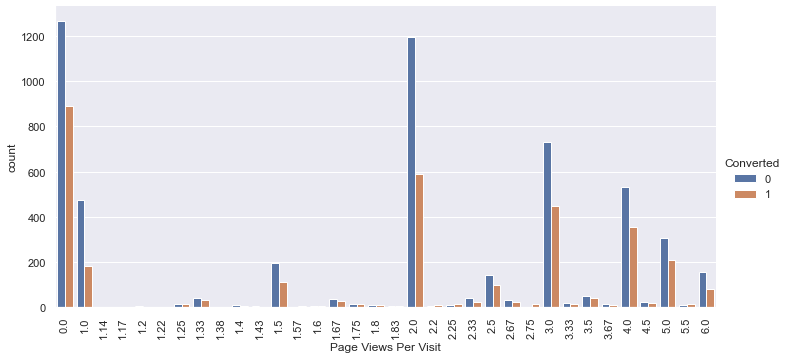

In [53]:

sns.catplot(x = "TotalVisits", hue = "Converted", data = df_cleaned, kind = "count") #, aspect =3
plt.show()
g = sns.catplot(x = "Page Views Per Visit", hue = "Converted", data = df_cleaned, kind = "count", aspect =2) 
g.set_xticklabels(rotation=90)
plt.show()


## Categorical variables against converted

<Figure size 4320x4320 with 0 Axes>

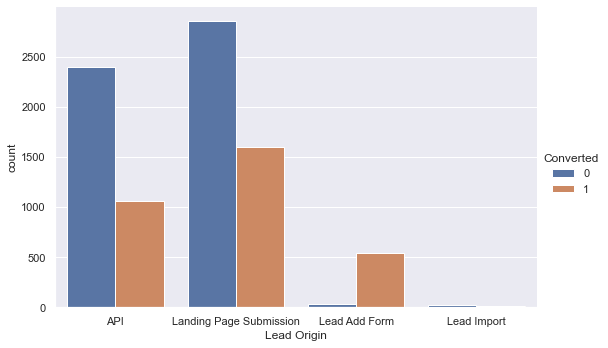

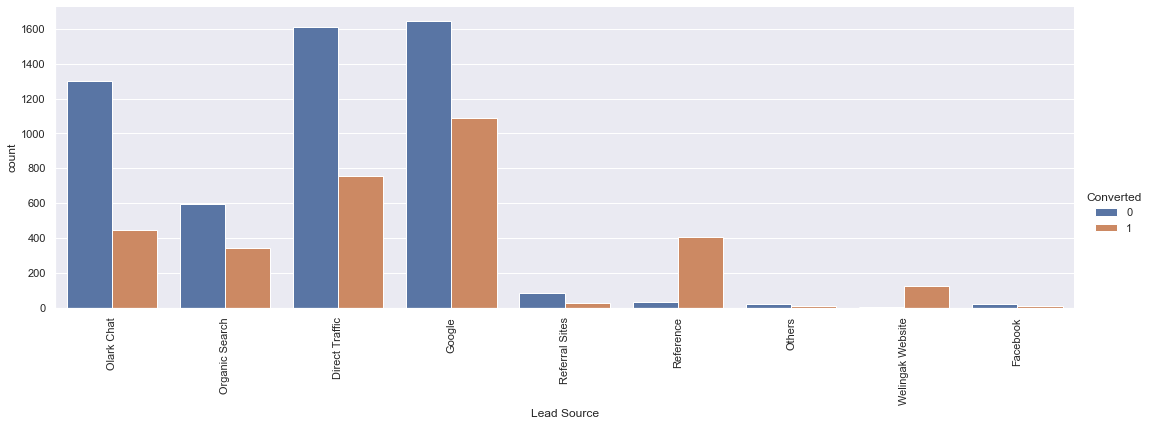

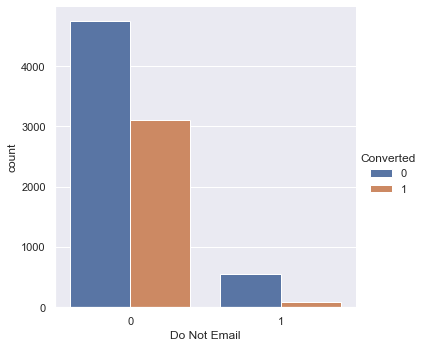

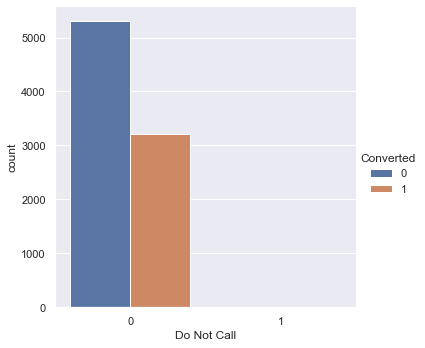

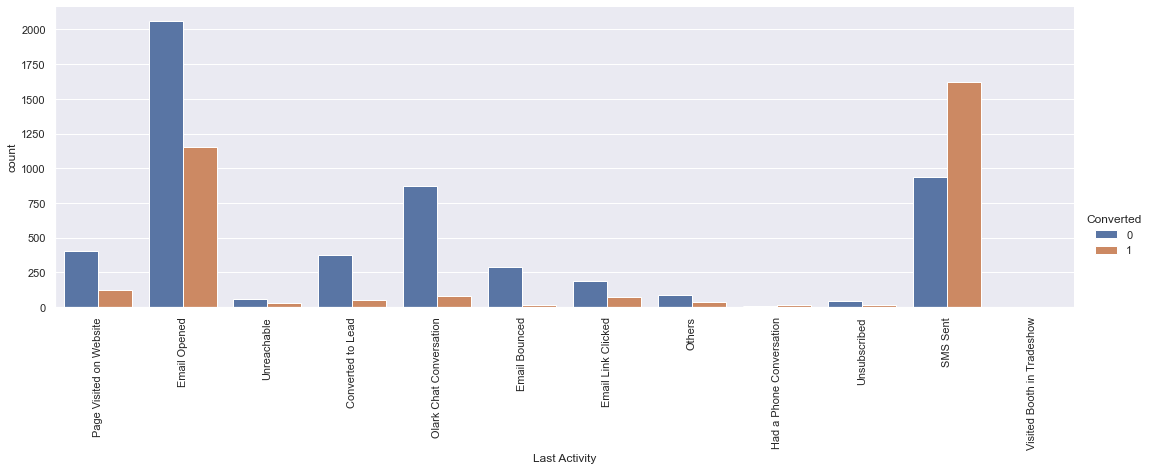

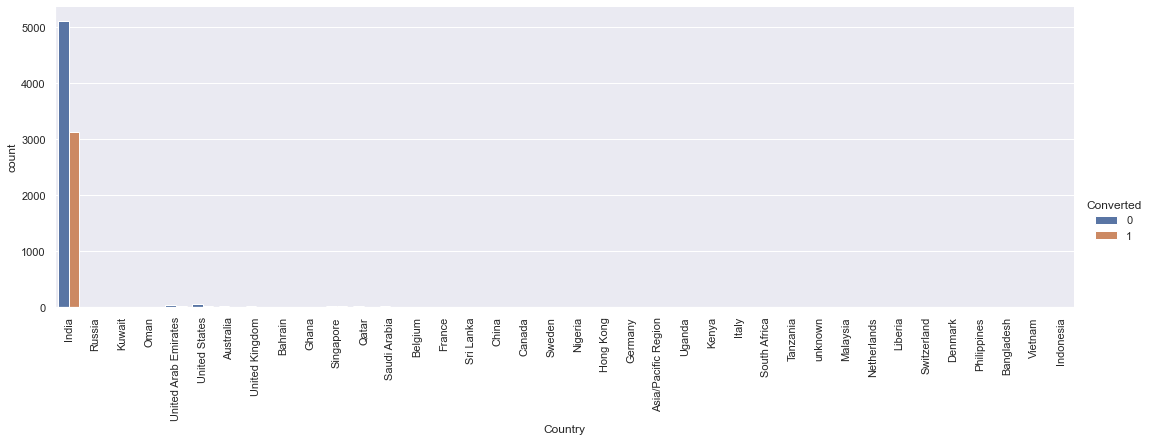

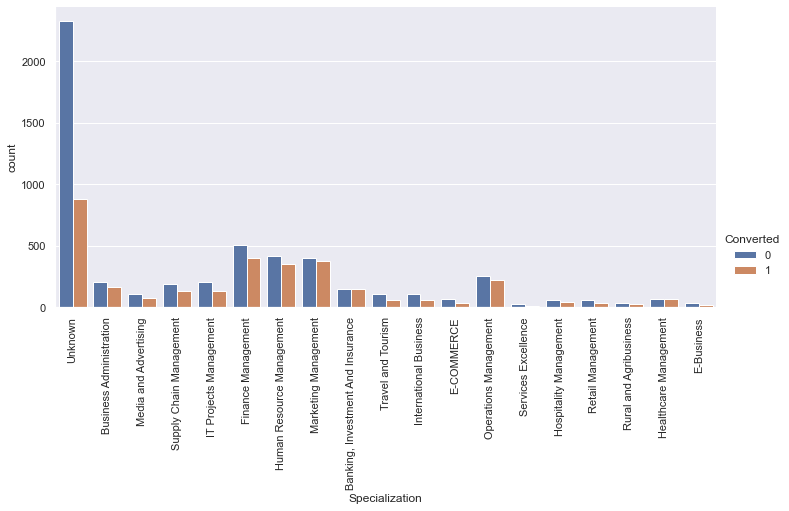

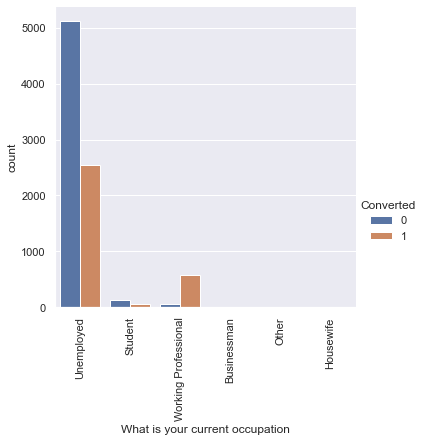

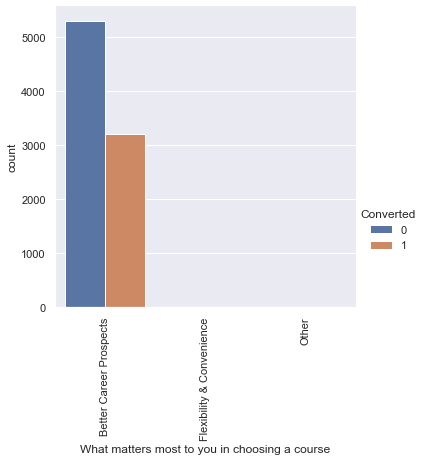

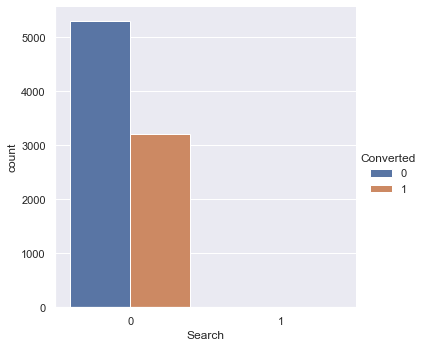

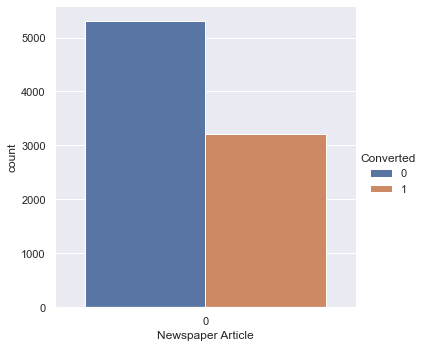

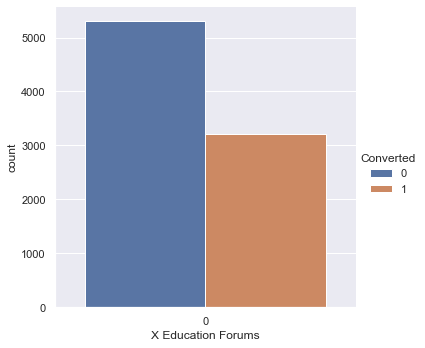

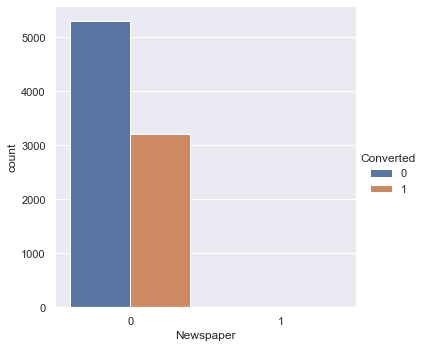

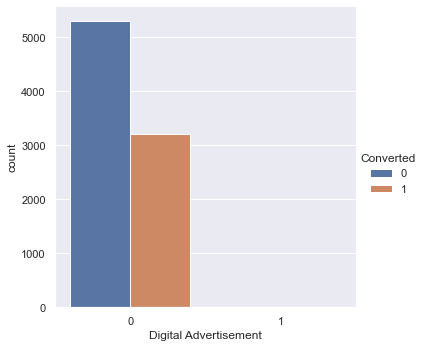

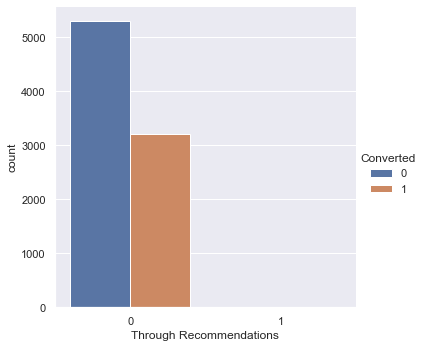

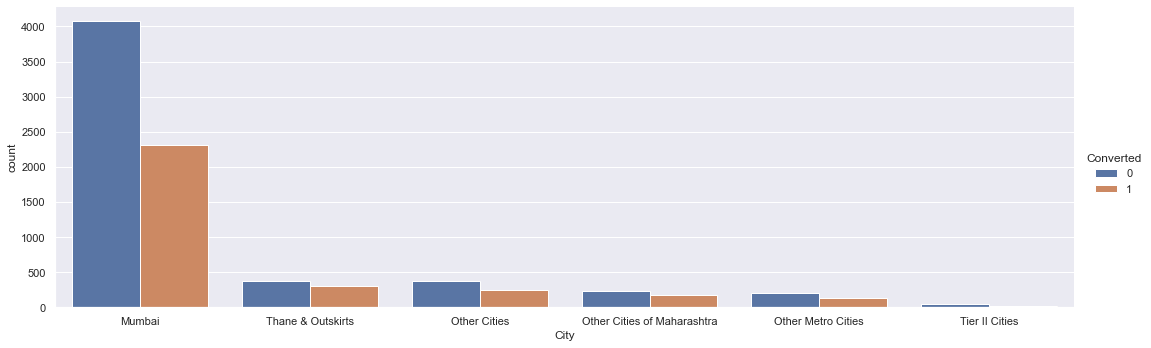

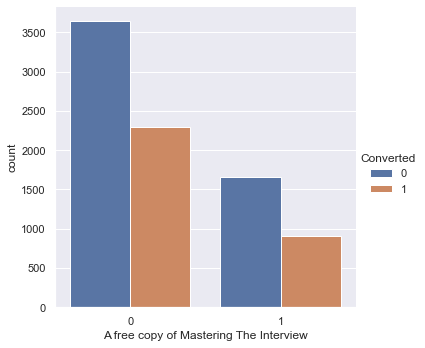

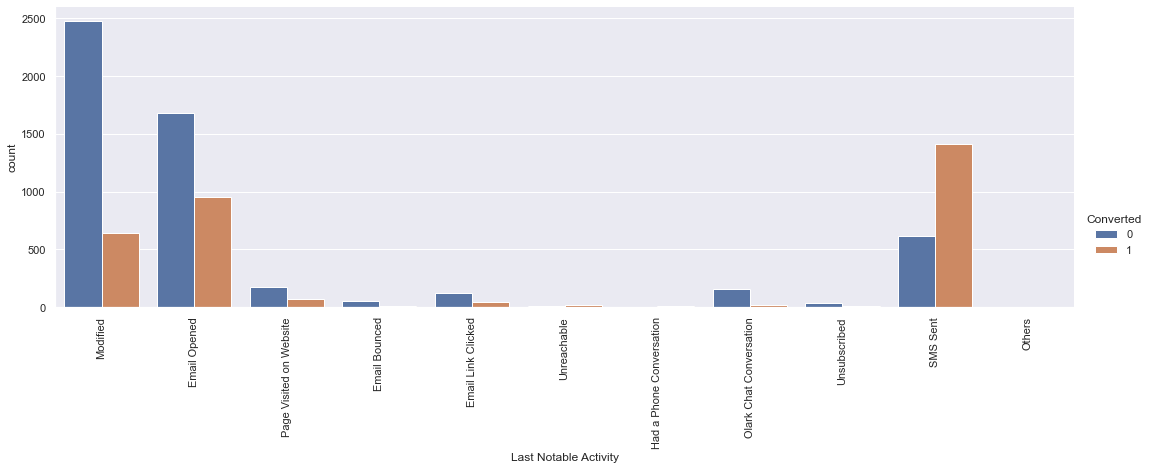

In [54]:
plt.figure(figsize = (60,60)) 
sns.catplot(x = "Lead Origin", hue = "Converted", data = df_cleaned, kind = "count", aspect =1.5)
plt.show()
g = sns.catplot(x = "Lead Source", hue = "Converted", data = df_cleaned, kind = "count", aspect =3)
g.set_xticklabels(rotation=90)
plt.show()
sns.catplot(x = "Do Not Email", hue = "Converted", data = df_cleaned, kind = "count")#, aspect =3.5)
plt.show()
sns.catplot(x = "Do Not Call", hue = "Converted", data = df_cleaned, kind = "count")#, aspect =3.5)
plt.show()
g = sns.catplot(x = "Last Activity", hue = "Converted", data = df_cleaned, kind = "count", aspect =3)
g.set_xticklabels(rotation=90)
plt.show()
g = sns.catplot(x = "Country", hue = "Converted", data = df_cleaned, kind = "count", aspect =3)
g.set_xticklabels(rotation=90)
plt.show()
g = sns.catplot(x = "Specialization", hue = "Converted", data = df_cleaned, kind = "count", aspect =2)
g.set_xticklabels(rotation=90)
plt.show()
g = sns.catplot(x = "What is your current occupation", hue = "Converted", data = df_cleaned, kind = "count")
g.set_xticklabels(rotation=90)
plt.show()
g = sns.catplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df_cleaned, kind = "count")
g.set_xticklabels(rotation=90)
plt.show()
g = sns.catplot(x = "Search", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "Newspaper Article", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "X Education Forums", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "Newspaper", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "Digital Advertisement", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "Through Recommendations", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "City", hue = "Converted", data = df_cleaned, kind = "count", aspect = 3)
plt.show()
g = sns.catplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_cleaned, kind = "count")#, aspect = 3)
plt.show()
g = sns.catplot(x = "Last Notable Activity", hue = "Converted", data = df_cleaned, kind = "count", aspect = 3)
g.set_xticklabels(rotation=90)
plt.show()

### Inferences :

1. Lead Origin : API and Landing page submission has high non converted count where as lead ad form has high converted value
2. Lead Source : All the Categories have high non converted count except references and welingak website have high converted count
3. Donot Email : Do not email is an sn indicator variable selected by the customer wherein they select whether or not they want to be emailed about the course or not.
The conversion rate is low in both 'yes' and 'no' cases.
4. Do not call : Do not call column is an indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not. The conversion rate is low.
5. Last Activity : All the Categories have high non converted count except sms sent have high converted count
6. Country : Data values are highly skewed towards category India
7. Specialization : Seems many courses like 'buisiness adminitration','banking investment and insurance','finance management' and few 
others have high convertion
8. What is your current occupation : The conversion rate is very high for working professionals but count is less. So this course should be advertised more to working professionals to increase the count.
9. What matters most to you in choosing a course : Almost all the people are opting the course for better career prospects.But the conversion rate is low. So more efforts should be put in designing the structure of the course.
10. Search,Newspaper Article,X Education forums,Newspaper,Digital Advertisement,Through Recommendations : All the above graphs indicating whether the customer had seen the through any of the above columns.(How did the lead get to know about the course).
All the leads found out about the course on their own and not through any of the above columns/items.
11. City : The conversion rates is low for all the cities but 'Mumbai' has the highest count. So more focus should be put in this city to improve the conversion rate.
12. A free copy of mastering the interview : Nothing can be inferred from this as the data is evenly distributed between yes and no
13. Last Notable Activity : The conversion rate is high for 'SMS Sent'.    

## Based on the analysis above some columns are providing very less information so dropping them would be ideal for our data model.

In [55]:
#Dropping the columns which doesnt give much inferences
df_cleaned = df_cleaned.drop(['What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Page Views Per Visit','TotalVisits','Last Activity','A free copy of Mastering The Interview','Country'],1)

In [56]:
# Final columns present in a cleaned data frame
df_cleaned.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Time Spent on Website', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

## Creating dummy variables for categorical variables:


In [57]:
# Creating dummies
dummy = pd.get_dummies(df_cleaned[['Lead Origin','Lead Source','Specialization','What is your current occupation','City',
                                   'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [58]:
# Adding the results back to the cleaned dataframe
df_cleaned = pd.concat([df_cleaned, dummy], axis=1)
df_cleaned.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0,0,Unknown,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,674,Unknown,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,1428,Unknown,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
# We have created dummies for the below variables, so we can drop them
# Dropping the columns whose dummies have been created
df_cleaned=df_cleaned.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [60]:
df_cleaned.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1532,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,305,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,1428,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
df_cleaned.shape

(8512, 53)

## Test-Train Split

In [62]:
# Putting feature variable to X
X = df_cleaned.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1532,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,305,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1428,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
# Putting response variable to y
y = df_cleaned['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [65]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6227,0,0,-0.863665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6322,0,0,0.114577,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3644,0,0,-0.838018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3011,0,0,-0.445988,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8267,0,0,-0.863665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Looking at correlations

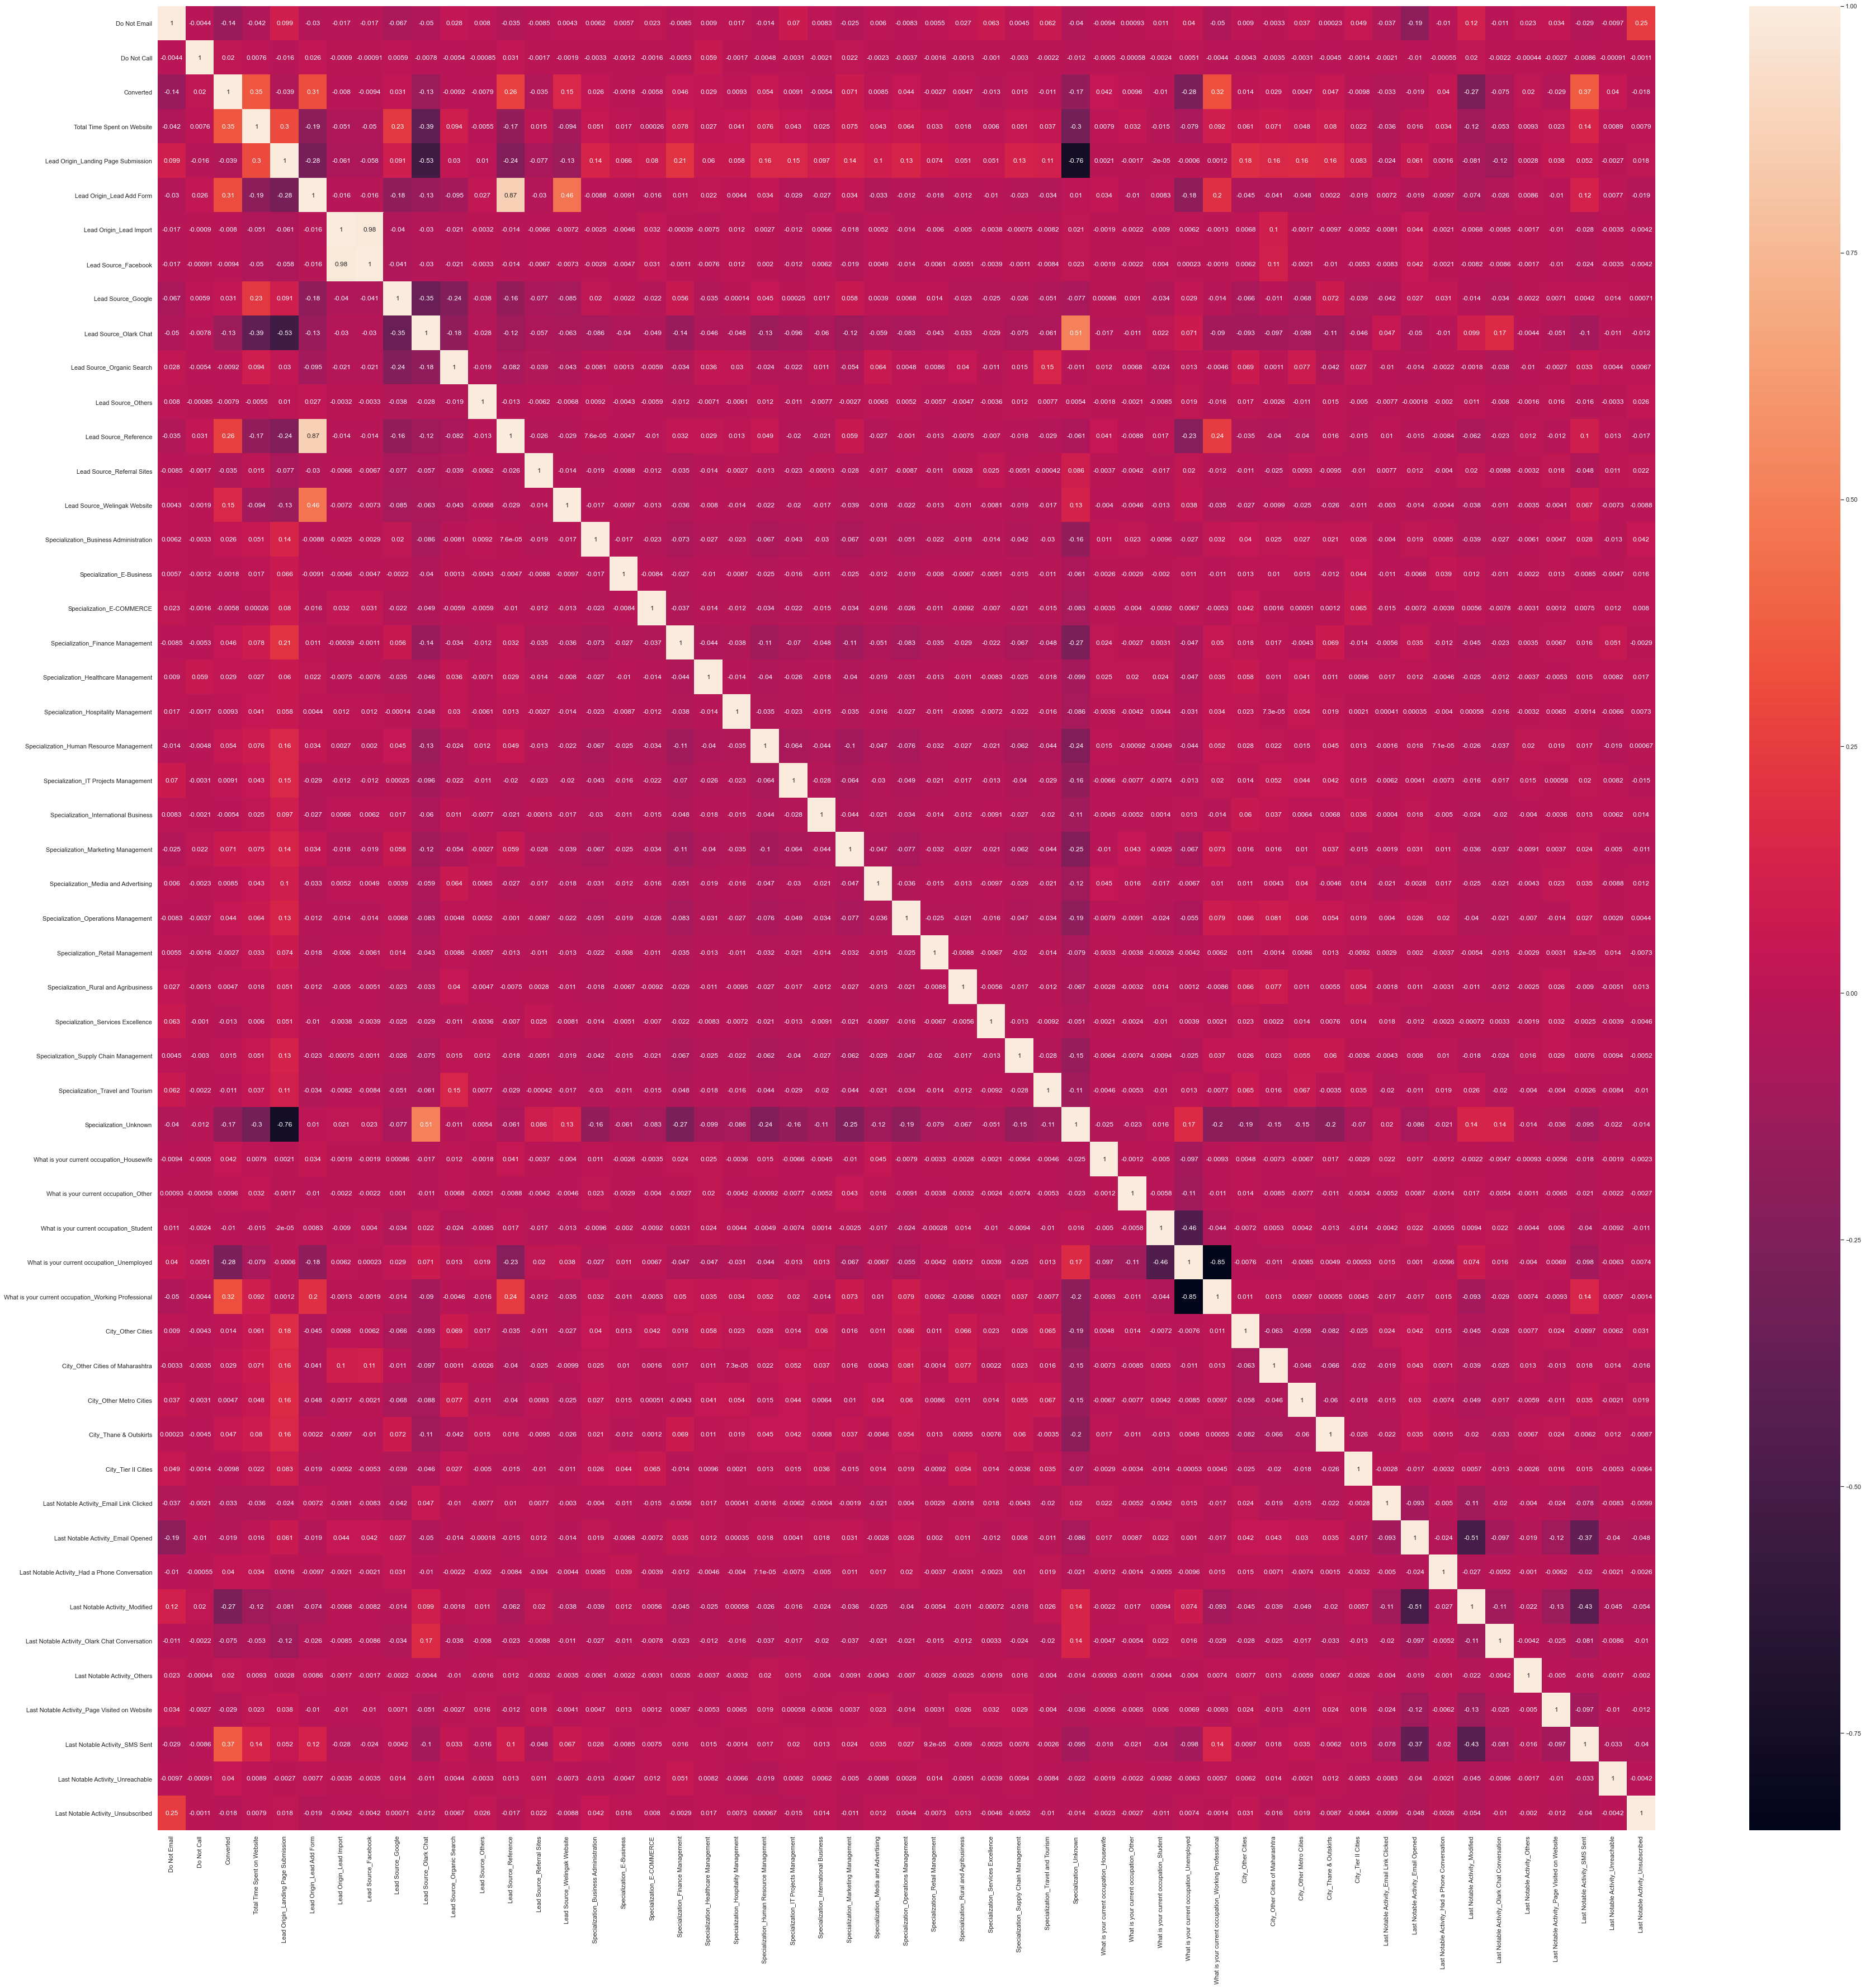

In [66]:
# Plotting the the correlation matrix 
plt.figure(figsize = (60,60))        # Size of the figure
sns.heatmap(df_cleaned.corr(),annot = True)
plt.show()

In [67]:
#Checking the present lead conversion rate
convert = (sum(df_cleaned['Converted'])/len(df_cleaned['Converted'].index))*100
convert

37.66447368421053

# Model Building

## Running First Training Model

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5906
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 06 Sep 2020   Deviance:                          nan
Time:                        16:26:36   Pearson chi2:                 7.26e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.161e+15   3.28e+07  -3.54e+07      0.000   -1.16e+15   -1.16e+15
Do Not Email                                         -9.687e+14   3.73e+06   -2.6e+08      0.000   -9.69e+14   -9.69e+14
Do Not Call                                            -10.0092   1.92e-07   -5.2e+07      0.000     -10.009     -10.009
Total Time Spent on Website                           6.753e+14   1.02e+06   6.65e+08      0.000    6.75e+14    6.75e+14
Lead Origin_Landing Page Submission                   4.623e+14   3.48e+06   1.33e+08      0.000    4.62e+14    4.62e+14
Lead Origin_Lead Add Form                             1.418e+15   2.97e+07   4.77e+07      0.000    1.42e+15    1.42e+15
Lead Origin_Lead Import                               5.007e+15   6.92e+07   7.23e+07      0.000    5.01e+15    5.01e+15
Lead Source_Facebook                                 -3.761e+15   6.76e+07  -5.57e+07      0.000   -3.76e+15   -3.76e+15
Lead Source_Google                                    1.371e+14   2.48e+06   5.53e+07      0.000    1.37e+14    1.37e+14
Lead Source_Olark Chat                               -4.269e+13   3.69e+06  -1.16e+07      0.000   -4.27e+13   -4.27e+13
Lead Source_Organic Search                            8.924e+13   3.33e+06   2.68e+07      0.000    8.92e+13    8.92e+13
Lead Source_Others                                    -7.22e+14   1.67e+07  -4.32e+07      0.000   -7.22e+14   -7.22e+14
Lead Source_Reference                                 8.417e+14   2.99e+07   2.81e+07      0.000    8.42e+14    8.42e+14
Lead Source_Referral Sites                           -1.704e+14   8.54e+06     -2e+07      0.000    -1.7e+14    -1.7e+14
Lead Source_Welingak Website                          1.142e+15   3.05e+07   3.74e+07      0.000    1.14e+15    1.14e+15
Specialization_Business Administration                1.712e+14   6.24e+06   2.74e+07      0.000    1.71e+14    1.71e+14
Specialization_E-Business                             3.684e+13   1.19e+07    3.1e+06      0.000    3.68e+13    3.68e+13
Specialization_E-COMMERCE                             1.234e+14   9.53e+06   1.29e+07      0.000    1.23e+14    1.23e+14
Specialization_Finance Management                     1.538e+14   5.33e+06   2.89e+07      0.000    1.54e+14    1.54e+14
Specialization_Healthcare Management                  2.629e+14   8.56e+06   3.07e+07      0.000    2.63e+14    2.63e+14
Specialization_Hospitality Management                -5.034e+14   9.28e+06  -5.42e+07      0.000   -5.03e+14   -5.03e+14
Specialization_Human Resource Management              6.507e+13   5.46e+06   1.19e+07      0.000    6.51e+13    6.51e+13
Specialization_IT Projects Management                 8.33

## Feature Selection Using RFE

In [69]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True])

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 29),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 24),
 ('Specialization_Healthcare Management', False, 7),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Projects Management', False, 28),
 ('Specialization_International Business'

In [72]:
col = X_train.columns[rfe.support_]

In [73]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Othe

Assessing the model with StatsModels

In [74]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5937
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2493.5
Date:                Sun, 06 Sep 2020   Deviance:                       4987.1
Time:                        16:26:44   Pearson chi2:                 6.01e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1224      0.669      0.183      0.855      -1.189       1.434
Do Not Email                                            -1.4452      0.196     -7.362      0.000      -1.830      -1.060
Total Time Spent on Website                              1.0550      0.041     25.520      0.000       0.974       1.136
Lead Origin_Landing Page Submission                     -1.0118      0.132     -7.658      0.000      -1.271      -0.753
Lead Origin_Lead Add Form                                1.6034      0.917      1.748      0.080      -0.194       3.401
Lead Origin_Lead Import                                  0.8657      0.571      1.517      0.129      -0.253       1.984
Lead Source_Olark Chat                                   0.9369      0.123      7.624      0.000       0.696       1.178
Lead Source_Reference                                    1.9094      0.939      2.034      0.042       0.069       3.750
Lead Source_Welingak Website                             5.1460      1.366      3.767      0.000       2.469       7.823
Specialization_Hospitality Management                   -0.8737      0.341     -2.560      0.010      -1.543      -0.205
Specialization_Unknown                                  -1.1683      0.125     -9.309      0.000      -1.414      -0.922
What is your current occupation_Housewife               23.5581   2.21e+04      0.001      0.999   -4.33e+04    4.33e+04
What is your current occupation_Student                 -0.1594      0.699     -0.228      0.820      -1.530       1.211
What is your current occupation_Unemployed              -0.4261      0.663     -0.643      0.520      -1.725       0.873
What is your current occupation_Working Professional     2.1757      0.690      3.152      0.002       0.823       3.529
Last Notable Activity_Had a Phone Conversation          22.9679   2.31e+04      0.001      0.999   -4.52e+04    4.52e+04
Last Notable Activity_Modified                          -0.5928      0.086     -6.868      0.000      -0.762      -0.424
Last Notable Activity_Olark Chat Conversation           -1.1803      0.326     -3.619      0.000      -1.819      -0.541
Last Notable Activity_SMS Sent                           1.4894      0.089     16.679      0.000       1.314       1.664
Last Notable Activity_Unreachable                        1.8687      0.612      3.054      0.002       0.670       3.068
Last Notable Activity_Unsubscribed                       1.2155      0.529      2.299      0.021       0.179       2.252
========================================================================================================================
"""

## Checking VIFs

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,68.86
6,Lead Source_Reference,52.67
7,Lead Source_Welingak Website,16.79
12,What is your current occupation_Unemployed,13.09
2,Lead Origin_Landing Page Submission,7.37
9,Specialization_Unknown,4.67
5,Lead Source_Olark Chat,2.35
15,Last Notable Activity_Modified,2.10
13,What is your current occupation_Working Profes...,1.87
17,Last Notable Activity_SMS Sent,1.70


The p value of column "What is your current occupation_Housewife" is very high. So dropping it

In [76]:
col = col.drop('What is your current occupation_Housewife', 1)

In [77]:
# Let's re-run the model using the selected variables
#Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5938
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.7
Date:                Sun, 06 Sep 2020   Deviance:                       4995.4
Time:                        16:26:45   Pearson chi2:                 6.01e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1238      0.580      1.939      0.053      -0.012       2.260
Do Not Email                                            -1.4551      0.197     -7.401      0.000      -1.840      -1.070
Total Time Spent on Website                              1.0526      0.041     25.496      0.000       0.972       1.133
Lead Origin_Landing Page Submission                     -1.0020      0.132     -7.593      0.000      -1.261      -0.743
Lead Origin_Lead Add Form                                1.6070      0.917      1.752      0.080      -0.190       3.404
Lead Origin_Lead Import                                  0.8667      0.570      1.520      0.129      -0.251       1.984
Lead Source_Olark Chat                                   0.9336      0.123      7.600      0.000       0.693       1.174
Lead Source_Reference                                    1.9086      0.939      2.033      0.042       0.069       3.749
Lead Source_Welingak Website                             5.1426      1.366      3.765      0.000       2.466       7.820
Specialization_Hospitality Management                   -0.8733      0.341     -2.561      0.010      -1.542      -0.205
Specialization_Unknown                                  -1.1623      0.125     -9.274      0.000      -1.408      -0.917
What is your current occupation_Student                 -1.1668      0.611     -1.910      0.056      -2.364       0.031
What is your current occupation_Unemployed              -1.4333      0.569     -2.520      0.012      -2.548      -0.319
What is your current occupation_Working Professional     1.1674      0.600      1.944      0.052      -0.009       2.344
Last Notable Activity_Had a Phone Conversation          21.9677    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
Last Notable Activity_Modified                          -0.5929      0.086     -6.878      0.000      -0.762      -0.424
Last Notable Activity_Olark Chat Conversation           -1.1778      0.326     -3.614      0.000      -1.817      -0.539
Last Notable Activity_SMS Sent                           1.4883      0.089     16.675      0.000       1.313       1.663
Last Notable Activity_Unreachable                        1.8562      0.614      3.023      0.003       0.653       3.060
Last Notable Activity_Unsubscribed                       1.2249      0.529      2.318      0.020       0.189       2.261
========================================================================================================================
"""

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,68.85
6,Lead Source_Reference,52.67
7,Lead Source_Welingak Website,16.79
11,What is your current occupation_Unemployed,12.92
2,Lead Origin_Landing Page Submission,7.27
9,Specialization_Unknown,4.64
5,Lead Source_Olark Chat,2.35
14,Last Notable Activity_Modified,2.10
12,What is your current occupation_Working Profes...,1.86
16,Last Notable Activity_SMS Sent,1.70


The p value of column 'Last Notable Activity_Had a Phone Conversation" is very high. So dropping it

In [79]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [80]:
# Let's re-run the model using the selected variables
#Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5939
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.4
Date:                Sun, 06 Sep 2020   Deviance:                       5002.8
Time:                        16:26:46   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1322      0.580      1.952      0.051      -0.005       2.269
Do Not Email                                            -1.4569      0.197     -7.408      0.000      -1.842      -1.071
Total Time Spent on Website                              1.0541      0.041     25.548      0.000       0.973       1.135
Lead Origin_Landing Page Submission                     -1.0075      0.132     -7.652      0.000      -1.266      -0.749
Lead Origin_Lead Add Form                                1.5993      0.917      1.744      0.081      -0.198       3.397
Lead Origin_Lead Import                                  0.8596      0.571      1.506      0.132      -0.259       1.978
Lead Source_Olark Chat                                   0.9318      0.123      7.591      0.000       0.691       1.172
Lead Source_Reference                                    1.9123      0.939      2.036      0.042       0.072       3.753
Lead Source_Welingak Website                             5.1497      1.366      3.770      0.000       2.472       7.827
Specialization_Hospitality Management                   -0.8790      0.341     -2.576      0.010      -1.548      -0.210
Specialization_Unknown                                  -1.1683      0.125     -9.335      0.000      -1.414      -0.923
What is your current occupation_Student                 -1.1662      0.611     -1.908      0.056      -2.364       0.032
What is your current occupation_Unemployed              -1.4287      0.569     -2.510      0.012      -2.544      -0.313
What is your current occupation_Working Professional     1.1754      0.601      1.957      0.050      -0.002       2.353
Last Notable Activity_Modified                          -0.6004      0.086     -6.970      0.000      -0.769      -0.432
Last Notable Activity_Olark Chat Conversation           -1.1846      0.326     -3.633      0.000      -1.824      -0.545
Last Notable Activity_SMS Sent                           1.4812      0.089     16.609      0.000       1.306       1.656
Last Notable Activity_Unreachable                        1.8485      0.614      3.010      0.003       0.645       3.052
Last Notable Activity_Unsubscribed                       1.2184      0.529      2.304      0.021       0.182       2.255
========================================================================================================================
"""

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,68.85
6,Lead Source_Reference,52.67
7,Lead Source_Welingak Website,16.79
11,What is your current occupation_Unemployed,12.87
2,Lead Origin_Landing Page Submission,7.26
9,Specialization_Unknown,4.64
5,Lead Source_Olark Chat,2.35
13,Last Notable Activity_Modified,2.10
12,What is your current occupation_Working Profes...,1.85
15,Last Notable Activity_SMS Sent,1.70


The p value of column 'Lead Origin_Lead Import" is very high. So dropping it

In [82]:
col = col.drop('Lead Origin_Lead Import', 1)

In [83]:
# Let's re-run the model using the selected variables
#Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5940
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.4
Date:                Sun, 06 Sep 2020   Deviance:                       5004.8
Time:                        16:26:47   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1563      0.580      1.994      0.046       0.020       2.293
Do Not Email                                            -1.4567      0.197     -7.410      0.000      -1.842      -1.071
Total Time Spent on Website                              1.0489      0.041     25.549      0.000       0.968       1.129
Lead Origin_Landing Page Submission                     -1.0300      0.131     -7.870      0.000      -1.287      -0.773
Lead Origin_Lead Add Form                                1.5746      0.916      1.718      0.086      -0.222       3.371
Lead Source_Olark Chat                                   0.9124      0.122      7.487      0.000       0.674       1.151
Lead Source_Reference                                    1.9130      0.939      2.038      0.042       0.073       3.752
Lead Source_Welingak Website                             5.1560      1.366      3.776      0.000       2.479       7.833
Specialization_Hospitality Management                   -0.8740      0.342     -2.555      0.011      -1.545      -0.203
Specialization_Unknown                                  -1.1794      0.125     -9.425      0.000      -1.425      -0.934
What is your current occupation_Student                 -1.1653      0.611     -1.906      0.057      -2.364       0.033
What is your current occupation_Unemployed              -1.4254      0.569     -2.504      0.012      -2.541      -0.310
What is your current occupation_Working Professional     1.1818      0.601      1.967      0.049       0.004       2.359
Last Notable Activity_Modified                          -0.6039      0.086     -7.014      0.000      -0.773      -0.435
Last Notable Activity_Olark Chat Conversation           -1.1870      0.326     -3.642      0.000      -1.826      -0.548
Last Notable Activity_SMS Sent                           1.4755      0.089     16.572      0.000       1.301       1.650
Last Notable Activity_Unreachable                        1.8395      0.614      2.997      0.003       0.637       3.042
Last Notable Activity_Unsubscribed                       1.2133      0.528      2.297      0.022       0.178       2.249
========================================================================================================================
"""

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,68.84
5,Lead Source_Reference,52.67
6,Lead Source_Welingak Website,16.79
10,What is your current occupation_Unemployed,12.65
2,Lead Origin_Landing Page Submission,7.17
8,Specialization_Unknown,4.63
4,Lead Source_Olark Chat,2.32
12,Last Notable Activity_Modified,2.10
11,What is your current occupation_Working Profes...,1.83
14,Last Notable Activity_SMS Sent,1.70


The VIF value of 'Lead Origin_Lead Add Form' is very high. So dropping it

In [85]:
col = col.drop('Lead Origin_Lead Add Form', 1)

In [86]:
# Let's re-run the model using the selected variables
#Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5941
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2504.0
Date:                Sun, 06 Sep 2020   Deviance:                       5007.9
Time:                        16:26:48   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1794      0.580      2.032      0.042       0.042       2.317
Do Not Email                                            -1.4570      0.197     -7.412      0.000      -1.842      -1.072
Total Time Spent on Website                              1.0459      0.041     25.513      0.000       0.966       1.126
Lead Origin_Landing Page Submission                     -1.0537      0.130     -8.085      0.000      -1.309      -0.798
Lead Source_Olark Chat                                   0.9020      0.122      7.417      0.000       0.664       1.140
Lead Source_Reference                                    3.4688      0.247     14.062      0.000       2.985       3.952
Lead Source_Welingak Website                             6.7205      1.018      6.601      0.000       4.725       8.716
Specialization_Hospitality Management                   -0.8781      0.342     -2.566      0.010      -1.549      -0.207
Specialization_Unknown                                  -1.1976      0.125     -9.595      0.000      -1.442      -0.953
What is your current occupation_Student                 -1.1640      0.612     -1.902      0.057      -2.363       0.035
What is your current occupation_Unemployed              -1.4216      0.570     -2.495      0.013      -2.538      -0.305
What is your current occupation_Working Professional     1.1815      0.601      1.965      0.049       0.003       2.360
Last Notable Activity_Modified                          -0.6067      0.086     -7.049      0.000      -0.775      -0.438
Last Notable Activity_Olark Chat Conversation           -1.1892      0.326     -3.650      0.000      -1.828      -0.551
Last Notable Activity_SMS Sent                           1.4737      0.089     16.559      0.000       1.299       1.648
Last Notable Activity_Unreachable                        1.8332      0.614      2.988      0.003       0.631       3.036
Last Notable Activity_Unsubscribed                       1.2097      0.528      2.292      0.022       0.175       2.244
========================================================================================================================
"""

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,12.54
2,Lead Origin_Landing Page Submission,7.12
7,Specialization_Unknown,4.60
3,Lead Source_Olark Chat,2.32
11,Last Notable Activity_Modified,2.10
10,What is your current occupation_Working Profes...,1.83
13,Last Notable Activity_SMS Sent,1.70
4,Lead Source_Reference,1.56
1,Total Time Spent on Website,1.33
8,What is your current occupation_Student,1.32


The VIF value of 'What is your current occupation_Unemployed' is very high. So dropping it

In [88]:
col = col.drop('What is your current occupation_Unemployed', 1)

In [89]:
# Let's re-run the model using the selected variables
#Model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5942
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.3
Date:                Sun, 06 Sep 2020   Deviance:                       5014.6
Time:                        16:26:48   Pearson chi2:                 6.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2254      0.130     -1.729      0.084      -0.481       0.030
Do Not Email                                            -1.4509      0.196     -7.397      0.000      -1.835      -1.067
Total Time Spent on Website                              1.0481      0.041     25.580      0.000       0.968       1.128
Lead Origin_Landing Page Submission                     -1.0627      0.130     -8.164      0.000      -1.318      -0.808
Lead Source_Olark Chat                                   0.9044      0.122      7.439      0.000       0.666       1.143
Lead Source_Reference                                    3.4792      0.246     14.122      0.000       2.996       3.962
Lead Source_Welingak Website                             6.7192      1.018      6.600      0.000       4.724       8.715
Specialization_Hospitality Management                   -0.8878      0.342     -2.594      0.009      -1.559      -0.217
Specialization_Unknown                                  -1.2125      0.125     -9.724      0.000      -1.457      -0.968
What is your current occupation_Student                  0.2501      0.230      1.087      0.277      -0.201       0.701
What is your current occupation_Working Professional     2.5948      0.201     12.888      0.000       2.200       2.989
Last Notable Activity_Modified                          -0.6043      0.086     -7.032      0.000      -0.773      -0.436
Last Notable Activity_Olark Chat Conversation           -1.1951      0.326     -3.664      0.000      -1.834      -0.556
Last Notable Activity_SMS Sent                           1.4669      0.089     16.492      0.000       1.293       1.641
Last Notable Activity_Unreachable                        1.8463      0.610      3.027      0.002       0.651       3.042
Last Notable Activity_Unsubscribed                       1.1953      0.528      2.264      0.024       0.160       2.230
========================================================================================================================
"""

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Unknown,2.28
3,Lead Source_Olark Chat,2.00
10,Last Notable Activity_Modified,1.94
2,Lead Origin_Landing Page Submission,1.82
12,Last Notable Activity_SMS Sent,1.62
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.23
0,Do Not Email,1.20
9,What is your current occupation_Working Profes...,1.19
5,Lead Source_Welingak Website,1.09


The p value of 'What is your current occupation_Student' is very high. So dropping it.

In [91]:
col = col.drop('What is your current occupation_Student', 1)

In [92]:
# Let's re-run the model using the selected variables
#Model 8
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.9
Date:                Sun, 06 Sep 2020   Deviance:                       5015.8
Time:                        16:26:49   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2186      0.130     -1.678      0.093      -0.474       0.037
Do Not Email                                            -1.4530      0.196     -7.405      0.000      -1.838      -1.068
Total Time Spent on Website                              1.0487      0.041     25.597      0.000       0.968       1.129
Lead Origin_Landing Page Submission                     -1.0615      0.130     -8.155      0.000      -1.317      -0.806
Lead Source_Olark Chat                                   0.9090      0.122      7.481      0.000       0.671       1.147
Lead Source_Reference                                    3.4845      0.246     14.153      0.000       3.002       3.967
Lead Source_Welingak Website                             6.7171      1.018      6.598      0.000       4.722       8.712
Specialization_Hospitality Management                   -0.8907      0.343     -2.600      0.009      -1.562      -0.219
Specialization_Unknown                                  -1.2137      0.125     -9.729      0.000      -1.458      -0.969
What is your current occupation_Working Professional     2.5886      0.201     12.862      0.000       2.194       2.983
Last Notable Activity_Modified                          -0.6068      0.086     -7.063      0.000      -0.775      -0.438
Last Notable Activity_Olark Chat Conversation           -1.1934      0.326     -3.663      0.000      -1.832      -0.555
Last Notable Activity_SMS Sent                           1.4625      0.089     16.467      0.000       1.288       1.637
Last Notable Activity_Unreachable                        1.8390      0.610      3.015      0.003       0.644       3.034
Last Notable Activity_Unsubscribed                       1.1892      0.528      2.252      0.024       0.154       2.224
========================================================================================================================
"""

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Unknown,2.27
3,Lead Source_Olark Chat,2.00
9,Last Notable Activity_Modified,1.94
2,Lead Origin_Landing Page Submission,1.80
11,Last Notable Activity_SMS Sent,1.61
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.23
0,Do Not Email,1.20
8,What is your current occupation_Working Profes...,1.19
5,Lead Source_Welingak Website,1.09


### All variables are now significant and VIF is below 2.5 for all variables.

Getting the predicted valueson the train set

In [94]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [95]:
y_train_pred[:10]

array([0.06770521, 0.12797774, 0.05920236, 0.08669822, 0.91475777,
       0.8642738 , 0.72300396, 0.66684779, 0.11548616, 0.913738  ])

In [96]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.067705,6227
1,0,0.127978,6322
2,0,0.059202,3644
3,0,0.086698,3011
4,1,0.914758,8267


In general we assume that lead is converted(1) if conv_prob is greater than 0.5

Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [97]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.067705,6227,0
1,0,0.127978,6322,0
2,0,0.059202,3644,0
3,0,0.086698,3011,0
4,1,0.914758,8267,1


In [98]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3293  427]
 [ 707 1531]]


In [99]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8096676737160121


## Accuracy might always not be the right metric. So calculating metrics beyond metric.
- Sensitivity
- Specificity
- false postive rate
- positive predictive value 
- Negative predictive value

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6840929401251117

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.8852150537634409

In [103]:
# Calculate false postive rate - predicting lead when it is not a lead
print(FP/ float(TN+FP))

0.11478494623655915


In [104]:
# positive predictive value 
print (TP / float(TP+FP))

0.7819203268641471


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.82325


## Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

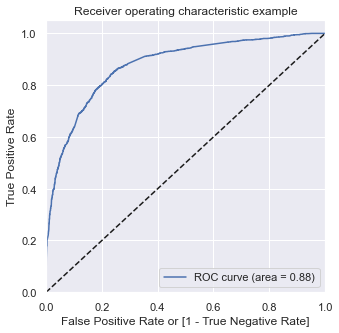

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067705,6227,0,1,0,0,0,0,0,0,0,0,0
1,0,0.127978,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.059202,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.086698,3011,0,1,0,0,0,0,0,0,0,0,0
4,1,0.914758,8267,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375629  1.000000  0.000000
0.1   0.1  0.537764  0.974978  0.274731
0.2   0.2  0.775764  0.878463  0.713978
0.3   0.3  0.795065  0.837355  0.769624
0.4   0.4  0.806311  0.764075  0.831720
0.5   0.5  0.809668  0.684093  0.885215
0.6   0.6  0.793723  0.571492  0.927419
0.7   0.7  0.782813  0.501340  0.952151
0.8   0.8  0.756965  0.400804  0.971237
0.9   0.9  0.720879  0.275693  0.988710


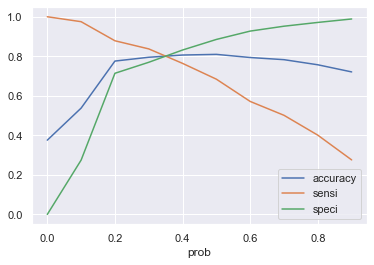

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.067705,6227,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.127978,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.059202,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.086698,3011,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.914758,8267,1,1,1,1,1,1,1,1,1,1,1,1


## We want to generate a Lead score between 0 to 100. So multiplying the probability with 100

In [113]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.067705,6227,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.127978,6322,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.059202,3644,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.086698,3011,0,1,0,0,0,0,0,0,0,0,0,0,9
4,1,0.914758,8267,1,1,1,1,1,1,1,1,1,1,1,1,91


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8007720711648204

In [115]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2977,  743],
       [ 444, 1794]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8016085790884718

In [118]:
#specificity
TN / float(TN+FP)

0.8002688172043011

In [119]:
# Calculate false postive rate - predicting lead converted when lead does not have converted
print(FP/ float(TN+FP))

0.19973118279569893


In [120]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7071344107213244


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8702133878982754


## Precision and Recall

In [122]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2977,  743],
       [ 444, 1794]], dtype=int64)

## Precision
TP / TP + FP

In [123]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7071344107213244

## Recall
TP / TP + FN

In [124]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8016085790884718

Using sklearn utilities for the same

In [125]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7071344107213244

In [126]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8016085790884718

## Precision and recall tradeoff

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

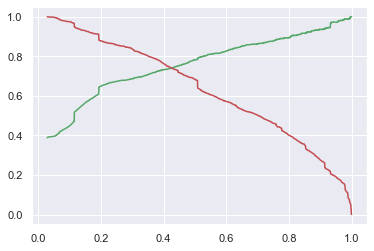

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Again we get same cutoff around 0.4 which is nearer

## Making predictions on the test set

In [129]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [130]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
9058,0,-0.849009,1,0,0,0,0,0,0,0,0,0,0,0
5002,0,-0.180361,1,0,0,0,0,0,0,0,0,1,0,0
3472,0,-0.579718,1,0,0,0,0,0,0,0,0,0,0,0
6698,0,3.056630,0,0,0,0,0,0,0,0,0,1,0,0
6387,0,-0.233487,1,0,0,0,0,0,0,0,0,0,0,0


In [131]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [132]:
y_test_pred = res.predict(X_test_sm)

In [133]:
y_test_pred[:10]

9058    0.102429
5002    0.498294
3472    0.131460
6698    0.988450
6387    0.178725
6385    0.143057
5395    0.896980
4522    0.115863
6407    0.193236
4542    0.077995
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
# Let's see the head
y_pred_1.head()

,0
9058,0.102429
5002,0.498294
3472,0.131460
6698,0.988450
6387,0.178725


In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [141]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,9058,0,0.102429
1,5002,0,0.498294
2,3472,0,0.131460
3,6698,1,0.988450
4,6387,0,0.178725


In [143]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [144]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,9058,0,0.102429,0
1,5002,0,0.498294,1
2,3472,0,0.131460,0
3,6698,1,0.988450,1
4,6387,0,0.178725,0


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8206734534064213

In [146]:
#Lead Score on Test data
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,9058,0,0.102429,0,10
1,5002,0,0.498294,1,50
2,3472,0,0.131460,0,13
3,6698,1,0.988450,1,99
4,6387,0,0.178725,0,18


In [147]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1298,  288],
       [ 170,  798]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8243801652892562

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.8184110970996217

In [151]:
# Calculate false postive rate - predicting lead converted when lead does not have converted
print(FP/ float(TN+FP))

0.18158890290037832


In [152]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7348066298342542


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8841961852861036


## Precision on Test data
TP / TP + FP

In [154]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7071344107213244

## Recall on Test data
TP / TP + FN

In [155]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8016085790884718

In [156]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7348066298342542

In [157]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8243801652892562

### Final Train and Test Sets

In [158]:
y_train_pred_final

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.067705,6227,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.127978,6322,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.059202,3644,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.086698,3011,0,1,0,0,0,0,0,0,0,0,0,0,9
4,1,0.914758,8267,1,1,1,1,1,1,1,1,1,1,1,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,0,0.115486,399,0,1,1,0,0,0,0,0,0,0,0,0,12
5954,0,0.330002,89,0,1,1,1,1,0,0,0,0,0,0,0,33
5955,0,0.193236,8740,0,1,1,0,0,0,0,0,0,0,0,0,19
5956,1,0.833995,7536,1,1,1,1,1,1,1,1,1,1,0,1,83


In [159]:
y_pred_final

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,9058,0,0.102429,0,10
1,5002,0,0.498294,1,50
2,3472,0,0.131460,0,13
3,6698,1,0.988450,1,99
4,6387,0,0.178725,0,18
...,...,...,...,...,...
2549,7135,0,0.115486,0,12
2550,8228,1,0.630155,1,63
2551,3462,1,0.482823,1,48
2552,7903,0,0.193236,0,19


   # <u><b><font size="6"><span style='font-family:"Times New Roman"'> Summary Report </span></font><b><u>



The above logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. Adding of a lead score column to the final model which is populated by multiplying the conversion probability value with 100 so that we get the score between 0-100.

1. The business can calculate the Lead score of each candidate using the optimal cut off and if the lead score is greater than 35 (as the cut off probability is 0.35) then that candidate can be considered as a Hot Lead and the sales team can concentrate more on that person to convert him into a potential paying customer.
2. To increase the lead score of the candidate the business can target the Lead source feature and try to increase the count of categories Welingak Website and Reference as it has more potential leads. Moreover, the business can target on working professionals as they can turn into possible prospect lead. The business needs to target less on leads who have selected the ‘Do not email’ option as there is a negative coefficient and this indicates that it doesn’t help the business.
3. If there is business decides to the increase the budget for sales team then it can reduce the probability cut off from 0.35 i.e., can target customers with lead score less than 35 as this change would lead to an increase in the targeted customers, and it might result in high lead conversion rate in turn improving the profits of the business.
4. And if the business wants to concentrate on any other vertical and intends to reduce the sales team work (thereby diverting the employees towards a new vertical, if any) then it can choose to increase the cut off from 0.35 to a higher one. This strategy can be applied when the business has reached its target and is willing to accept less lead conversion rate. During the application of this strategy, make sure that you target at least those with lead source of welingak and reference categories and working professionals as these have very high prospects of getting hot leads and potential paying customers. 

To conclude the conversion rate of the leads is 80% when the lead with lead score 38 and above is targeted.
